# Kmeansによる社説のクラスタリング

In [29]:
from sklearn.cluster import KMeans
import numpy as np

In [30]:
#vec_arrayにすべての文書ベクトルを定義する処理
vec_array = np.zeros((2816,100)) #0初期化、2816ファイル×100語の基底ベクトル

#文書ベクトルはそれぞれ0.txt～2816.txtファイルで定義されている、既にtf*idfは取得済
file_num=0
i=0
while file_num<2816:
    f=open(str(file_num)+'.txt','r',encoding="utf-8")
    for line in f:
        vec, word = line.split(' ')
        vec_array[file_num][i]=vec
        i += 1
        
    f.close()
    file_num += 1
    i=0

In [31]:
pred = KMeans(n_clusters=100, init='random').fit_predict(vec_array) #まずはrandomで初期化してやってみる

In [32]:
pred_pp = KMeans(n_clusters=100,init='k-means++').fit_predict(vec_array) #K-means++で初期化してやってみる

# データの可視化

In [33]:
# 準備作業
list=[[] for j in range(100)]

In [34]:
#クラスタごとのキーワードをいくつか決める処理(random初期化の結果の方)
for i in range(2816):
    cluster=pred[i]
    f=open('../head_100/'+str(i)+'.txt','r',encoding="utf-8")
    for j in range(3):
        line = f.readline()
        vec, word = line.split(' ')
        word = ''.join(word.splitlines())
        list[cluster].append(word)     
    f.close()

In [35]:
# 準備作業
list2=[[] for j in range(100)]

In [36]:
#クラスタごとのキーワードを取る処理(kmeans++の方)
for i in range(2816):
    cluster=pred_pp[i]
    f=open('../head_100/'+str(i)+'.txt','r',encoding="utf-8")
    for j in range(2):
        line = f.readline()
        vec, word = line.split(' ')
        word = ''.join(word.splitlines())
        list2[cluster].append(word)     
    f.close()

## WordCloudによる可視化

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## 左がRandom 右がKmeans++

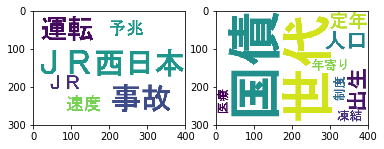

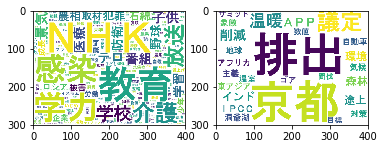

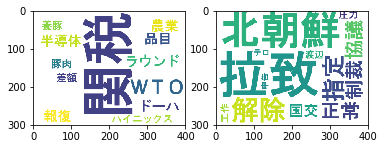

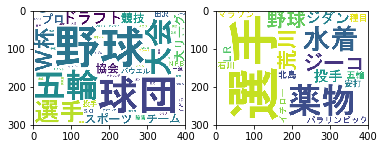

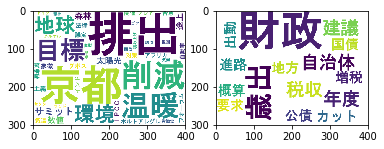

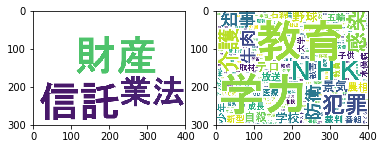

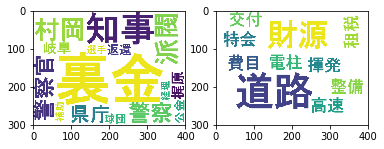

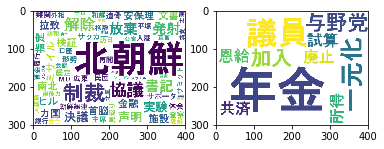

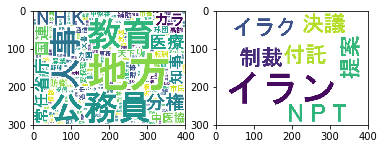

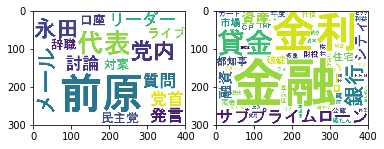

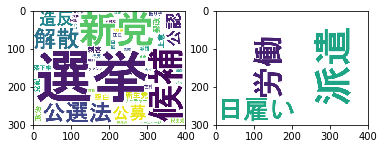

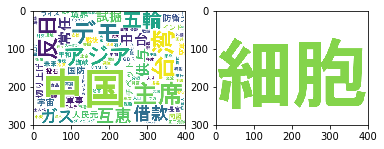

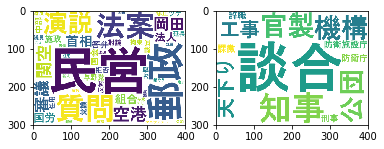

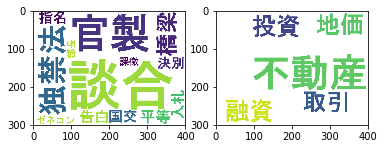

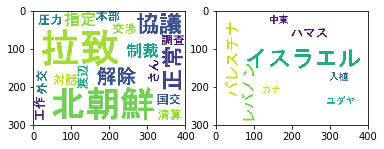

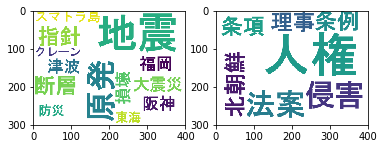

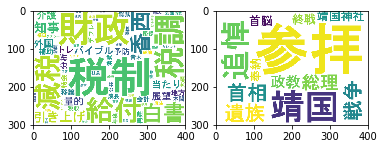

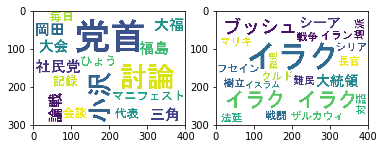

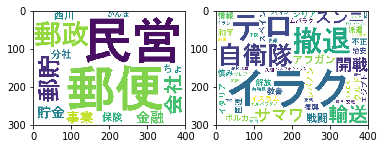

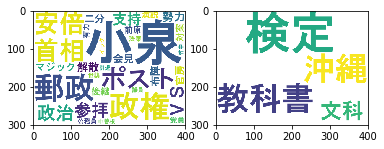

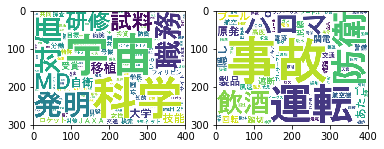

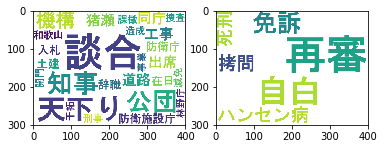

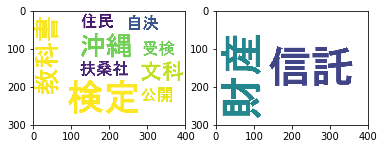

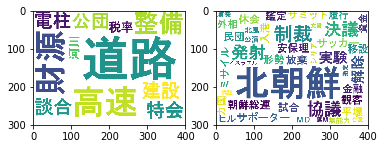

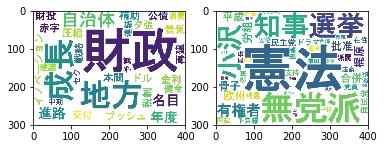

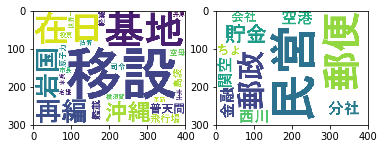

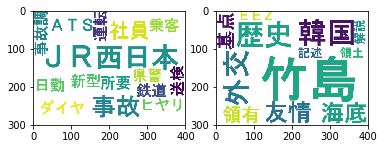

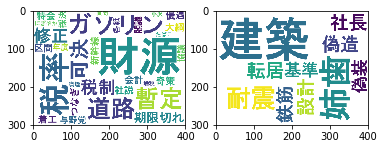

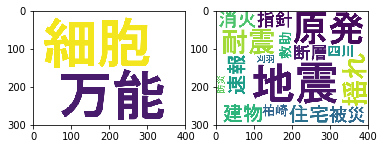

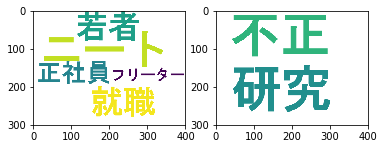

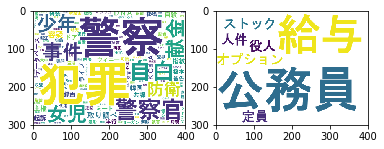

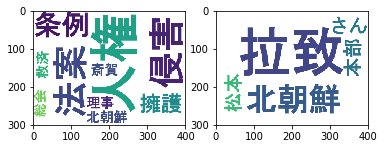

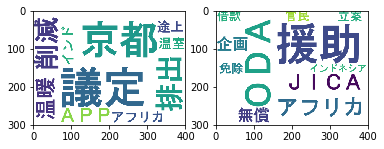

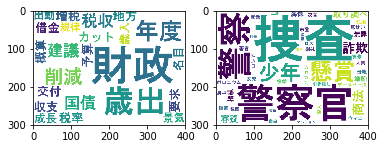

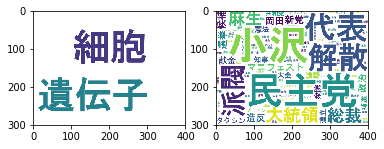

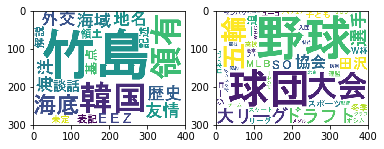

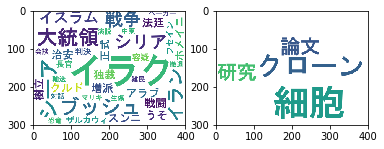

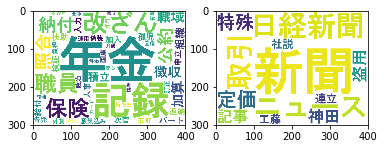

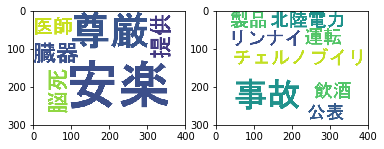

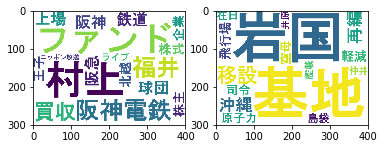

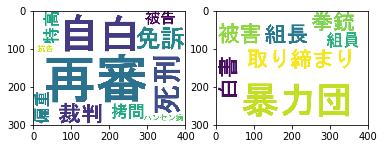

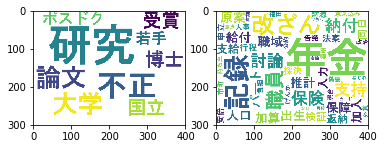

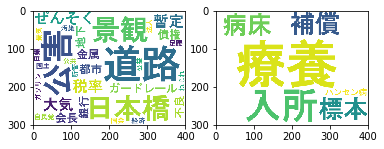

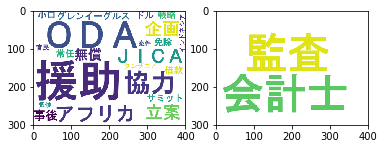

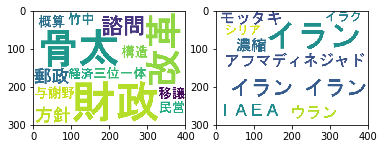

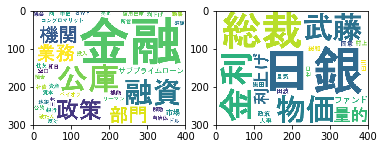

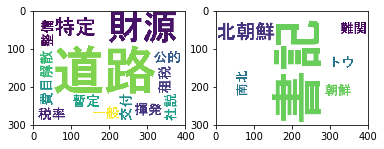

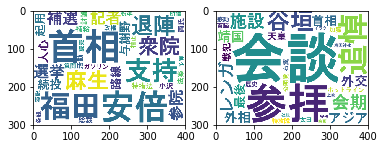

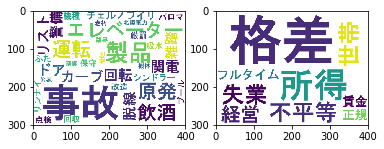

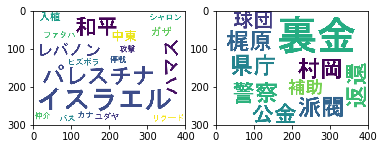

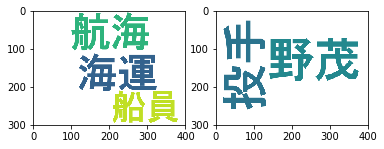

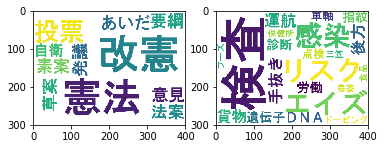

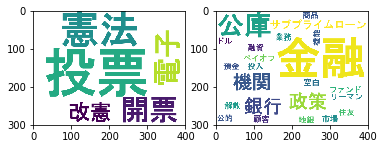

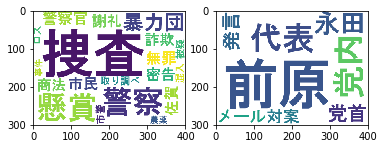

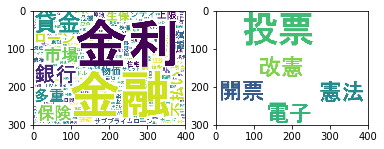

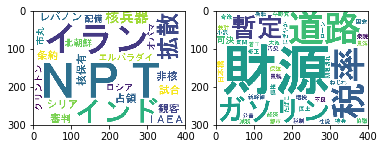

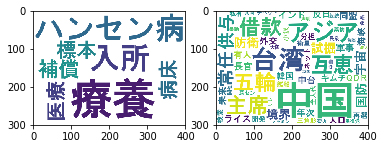

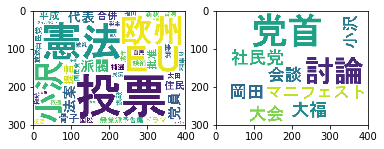

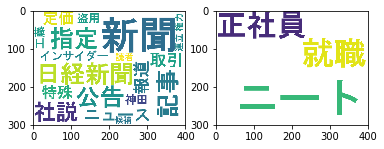

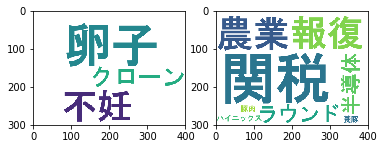

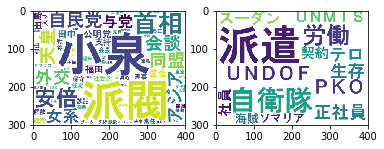

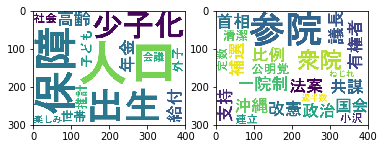

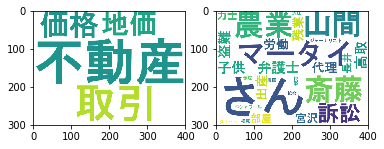

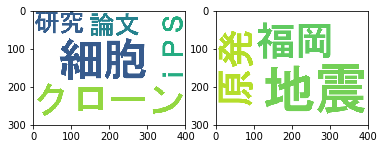

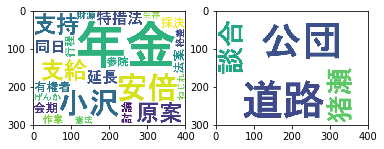

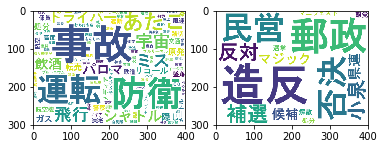

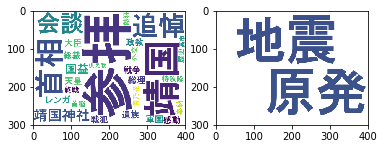

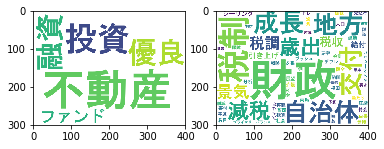

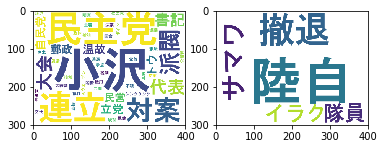

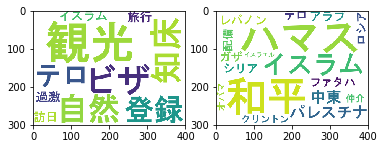

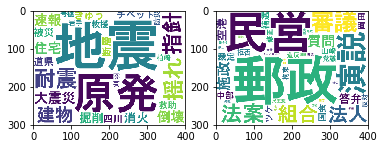

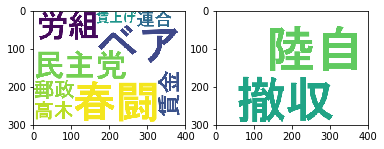

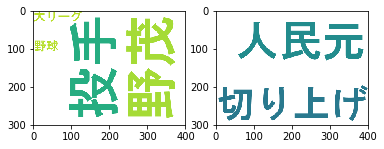

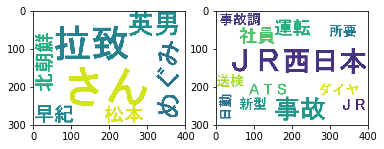

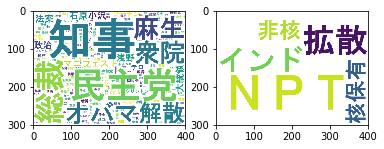

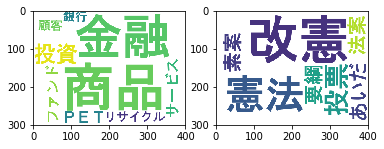

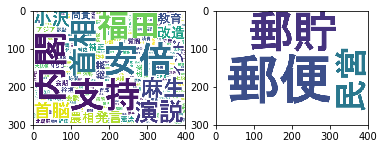

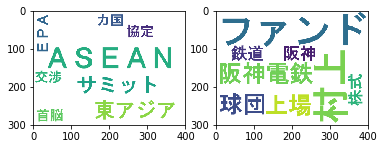

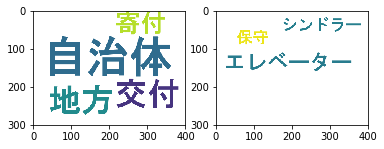

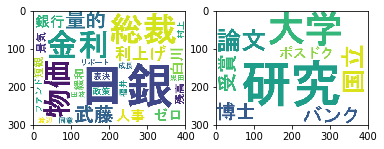

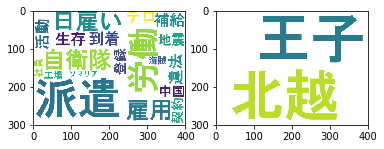

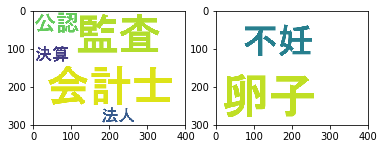

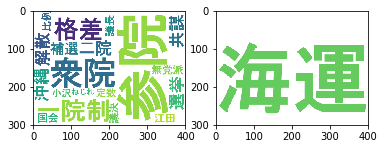

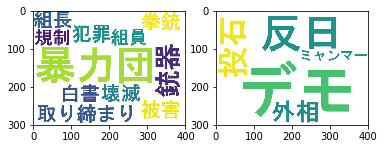

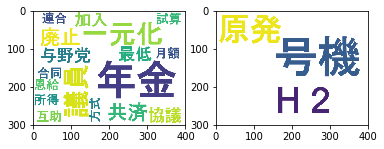

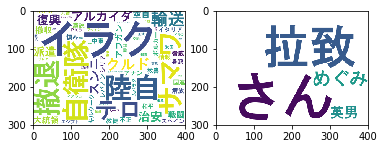

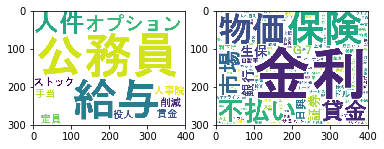

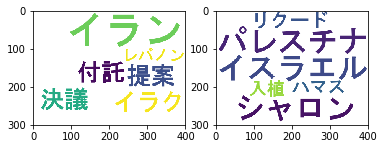

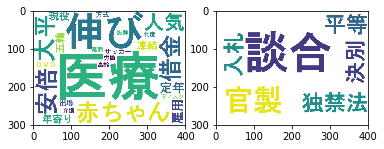

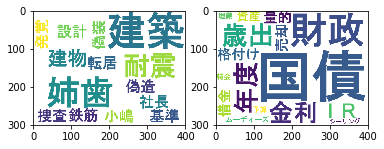

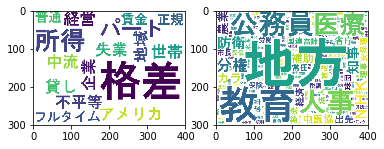

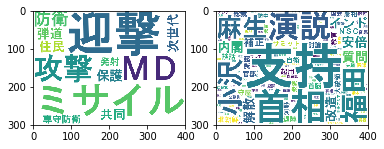

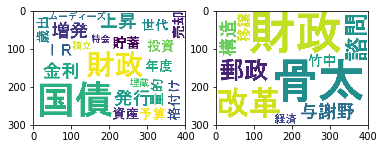

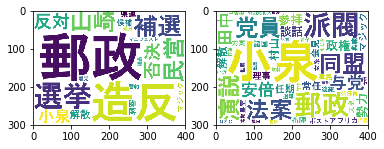

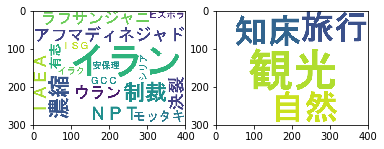

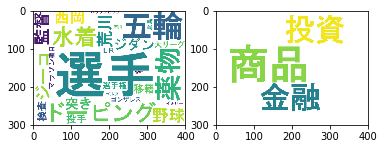

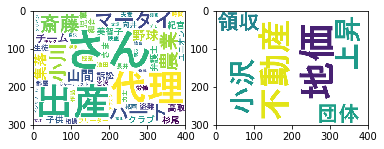

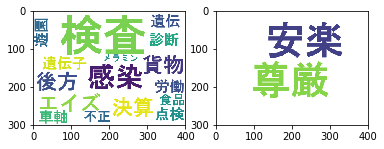

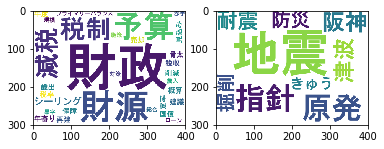

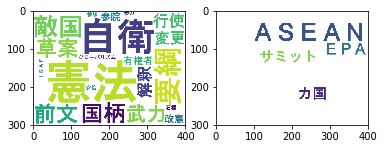

In [53]:
keywords=""
keywords2=""
for i in range(100):
    keywords =  ' '.join(list[i])
    word_cloud = WordCloud(background_color="white",font_path="./HGRGE.TTC",width=400,height=300).generate(keywords)
    keywords2 =  ' '.join(list2[i])
    word_cloud2 = WordCloud(background_color="white",font_path="./HGRGE.TTC",width=400,height=300).generate(keywords2)
    f,axarr = plt.subplots(1,2)
    axarr[0].imshow(word_cloud)
    axarr[1].imshow(word_cloud2)
    plt.show()
    keywords=""
    keywords2=""